# Aula 05 - Exercício 04

### Alunos:
 - 
 - 

## Perceptron e Data augmentation 
Neste exercicio utilizaremos o classificador Perceptron para classificar dois dígitos. No código abaixo os dois digitos são carregados e exibidos lado a lado.

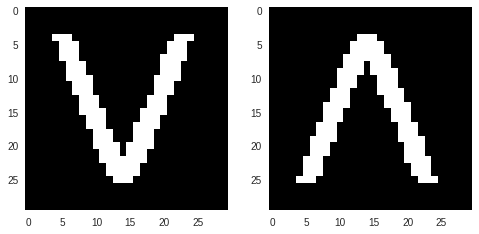

In [2]:
from skimage.io import imread
from matplotlib import pyplot as plt

# Lendo as duas imagens originais
V = imread("V.png", as_grey=True)
V_inv = imread("inv_V.png", as_grey=True)

# Figura vai ter 1 linha e 2 colunas
rows = 1
columns = 2
fig = plt.figure(figsize=(8, 8))

# Exibindo primeira imagem
fig.add_subplot(rows, columns, 1)
plt.grid(False)
plt.imshow(V)

# Exibindo segunda imagem
fig.add_subplot(rows, columns, 2)
plt.grid(False)
plt.imshow(V_inv)
plt.show()



---

- Dado o código acima, aplique ruído (random_nosie) no primeiro símbolo e rotacione (transform.rotate) em 25º o segundo símbolo antes de exibi-los.
  - Dica: Para o `random_noise` utilize parametro `mode='pepper' ` e  para `transform.rotate` utilize `preserve_range=True, mode='constant', cval=1`

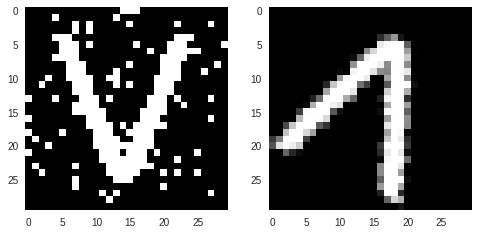

In [3]:
from skimage.util import random_noise
from skimage import transform

# Figura vai ter 1 linha e 2 colunas
rows = 1
columns = 2
fig = plt.figure(figsize=(8, 8))

# Adicionando ruído a imagem original
fig.add_subplot(rows, columns, 1)
plt.grid(False)
img = random_noise(V, mode='pepper', seed=0, amount=0.1)
plt.imshow(img)

# Rotacionando a imagem original
fig.add_subplot(rows, columns, 2)
plt.grid(False)
img = transform.rotate(V_inv, -25,preserve_range=True, mode='constant', cval=1)
plt.imshow(img)
plt.show()



---

- Agora defina a função `gen_data` abaixo. A função recebe como parâmetros: uma imagem base (v ou v invertido), a quantidade de dados artificiais a serem gerados, a classe da imagem base passada e uma lista de dados e labels. A função deve concatenar (`append`) as imagens geradas na lista `data` e suas respectivas classes na lista `target`.

  - Dica: Utilize a função `random.uniform(-a, a)` para gerar valores aleatórios entre -a e a para criar angulos de rotação variados.

In [0]:
import random

def gen_data(base_image, quantity, label, data, target):
  for i in range(0, quantity):
    img = random_noise(base_image, mode='pepper', seed=i, amount=0.1)
    random_degree = random.uniform(-25, 25)        
    img = transform.rotate(img, random_degree,
                        preserve_range=True, mode='constant', cval=1)        
    data.append(img)
    target.append(label)



---


- Edite a linha abaixo do comentário para exibir uma imagem 4x4 do dataset criado acima.

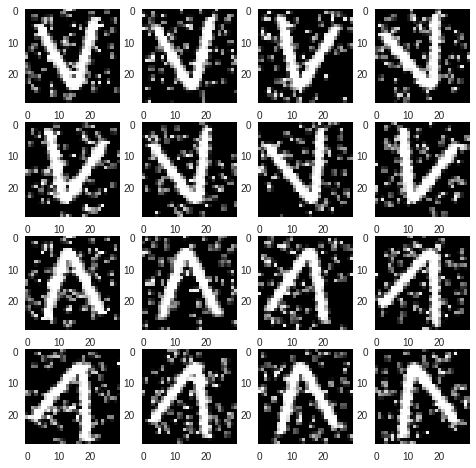

In [5]:
import numpy as np

x = []
y = []

gen_data(V, 8 , 0, x, y)
gen_data(V_inv, 8, 1, x, y)
x = np.asarray(x)
y = np.asarray(y)
############################


# Figura vai ter 4 linhas e 4 colunas
rows = 4
columns = 4
fig = plt.figure(figsize=(8, 8))

# Exibindo as 16 imagens
for i in range(1, rows*columns + 1):
  fig.add_subplot(rows, columns, i)
  plt.grid(False)
  plt.imshow(x[i-1])



---

- Separe o dataset criado em 12 imagens de treinamento e 4 imagens de teste utilizando a função `train_test_split`. Depois treine um classificador do tipo Perceptron no conjunto de treino. Calcule a acuracia para os conjuntos de treino e teste.

  - Dica: Você deve transformar as dimensões do conjunto de entrada para utilizar o Perceptron. Uma observação do conjunto é uma matriz 30x30. Para aplicar essa matriz no perceptron, você deve transforma-la em um vetor com 30x30 =900 elementos. Para isso utilize a função reshape da biblioteca numpy para transformar o conjunto x por inteiro.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

x_f = x.reshape(x.shape[0], x.shape[1] * x.shape[2])

x_train, x_test, y_train, y_test = train_test_split(x_f, y, test_size=4, random_state=0)

print(x_train.shape)
print(x_test.shape)

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print("Train acc: %.2f" % accuracy_score(y_train, y_pred))

y_pred = clf.predict(x_test)
print("Test acc: %.2f" % accuracy_score(y_test, y_pred))

(12, 900)
(4, 900)
Train acc: 1.00
Test acc: 1.00




---

Devido à natureza da função threshold, podemos ter uma falsa sensação de quê nosso classificador classifica os exemplos com a mesma confiança. Porém, isso não é verdadeiro. No caso do perceptron utilizado, podemos ter uma medida da confiança do classificador para um dado exemplo calculando a distância relativa desse exemplo para o hiperplano separador. Essa medida pode ser obtida através da função `decision_function(X)`

- Utilize a função  `decision_function(X)` para calcular a distância dos exemplos query0.png ~ query4.png ao hiperplano separador do classificador treinado no item anterior e analise a relação entre distância x confiança x qualidade do símbolo na imagem.

In [10]:
query = []
query.append(imread("query0.png", as_grey=True))
query.append(imread("query1.png", as_grey=True))
query.append(imread("query2.png", as_grey=True))
query.append(imread("query4.png", as_grey=True))
query = np.asarray(query)
query = query.reshape(4,900)

labels = ['v', 'v inv']
for i in clf.predict(query):
  print(labels[i])
print(clf.decision_function(query))

v inv
v inv
v inv
v
[ 2.02060279  8.94500162 26.30080069 -4.43273456]


Nota-se que quanto pior a qualidade da imagem, menor a confiança do classificador, ou seja, a distância do hiperplano separador será menor.

O classificador só errou o primeiro exemplo, e sua distância do hiperplano foi relativamente baixa. Isso significa que a confiança do classificador nessa imagem foi baixa.

A classificação com maior distância foi a que apresentava mais qualidade (o caractere estava mais claramente representado)